# Universidad de Costa Rica
## Centro de Investigaciones Espaciales - CINESPA

Proyecto:  Estudio de la radiación de microondas y rayos X como índicadores de la velocidad de propagación de CME's en el medio interplanetario.

Coordinadores: Carolina Salas -
               Felipe Meza
               
Asistente: Yasser Wagon

Periodo: II ciclo- 2018


# Manejo de archivos FITS usando la librería Astropy

Las imágenes solares, contenidas en archivos FITS, requieren ser manejadas por librerías especializadas para ello. Astropy es una librería muy utilizada para lograr dicho objetivo. A continuación se describen funciones básicas para el manejo de archivos FITS.

Flexible Image Transport System (FITS) es un formato de archivo usado en astronomía. Los archivos se conforman de una lista de Header Data Unit (HDU) tambien llamado HDUList, cada HDU consta de un encabezado y un array de datos. El array de datos puede ser una imagen o una tabla. 


Se importan las librerías necesarias, entre la que se encuentra 'fits' de Astropy. Además se importan numpy y matplotlib.


In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt


Los archivos FITS se encuentran en la carpeta "ImageFITS" del repositorio. Para abrir un archivo FITS, se utiliza la función fits.open()

In [2]:
sunImageFile = fits.open('ImageFITS/5.fits')
sunImageFile.info()

Filename: ImageFITS/5.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     248   (2048, 2048)   int16 (rescales to uint16)   


Es posible obtener el HDUList del archivo FITS, con el método HDUList.info(). Es importante notar que la función fits.open(), retorna un objeto HDUList.

Se observa que '5.fits' contiene solo un HDU llamado PRIMARY. El header contiene 248 datos, y el tamaño de la imagen es de 2048x2048 pixeles.

Cada HDU posee dos atributos, el header y el arreglo de datos. Se imprime el header del archivo '5.fits',

In [3]:
sunImageFile[0].header


SIMPLE  =                    T / Written by IDL:  Wed Jan  4 17:40:11 2012      
BITPIX  =                   16 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 2048 /                                                
NAXIS2  =                 2048 /                                                
DATE-OBS= '2012-01-01T01:06:15.005' /                                           
FILEORIG= 'C101008A.443'       /                                                
SEB_PROG= 'NORMAL  '           /                                                
SYNC    =                    F /                                                
SPWX    =                    F /                                                
EXPCMD  =              4.00179 /                                                
EXPTIME =              4.00206 / from MEB                                       
DSTART1 =                   

Para guardar algún card (datos que conforman el header) en una variable, se puede hacer de forma indexada o utilizando la etiqueta. Se obtiene e imprime la fecha de observación utilizando ambas formas.

In [4]:
date1 = sunImageFile[0].header[5]
date2 = sunImageFile[0].header['DATE-OBS']

print date1
print date2

2012-01-01T01:06:15.005
2012-01-01T01:06:15.005


Se puede obtener el arreglo de datos del HDU de dos formas. Una es usando la función fits.getdata(), y la otra es accediendo al atributo data que posee cada objeto HDU. A continuación, se obtiene la imagen contenida en el archivo '5.fits' de las dos formas ya comentadas. Seguidamente se imprime la matriz que representa la imagen y dimensión de la misma.

In [7]:
image_data1 = fits.getdata('ImageFITS/5.fits', ext=0)
image_data2 = sunImageFile[0].data

print(image_data1)
print(image_data1.shape)
print('\n')
print(image_data2)
print(image_data2.shape)

[[730 730 730 ..., 722 722 722]
 [728 728 728 ..., 722 722 722]
 [726 726 726 ..., 722 722 722]
 ..., 
 [724 724 724 ..., 724 724 724]
 [724 724 724 ..., 724 724 724]
 [724 724 724 ..., 724 724 724]]
(2048, 2048)


[[730 730 730 ..., 722 722 722]
 [728 728 728 ..., 722 722 722]
 [726 726 726 ..., 722 722 722]
 ..., 
 [724 724 724 ..., 724 724 724]
 [724 724 724 ..., 724 724 724]
 [724 724 724 ..., 724 724 724]]
(2048, 2048)


Se desplega la imagen con la librería matplotlib. Es posible guardar la imagen resultante usando la función plt.savefig().

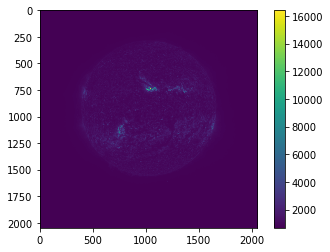

In [11]:
%matplotlib inline
plt.figure()
plt.imshow(image_data1)
plt.colorbar()

![title](outFitsImagePLT.png)
![title](outFitsImageCV.png)